## Treinando uma Rede Neural Convolucional usando o Keras

- Arquitetura simples com duas camadas convolucionais
- Utilizando um conjunto de imagens de células cervicais

## Base de imagens de células cervicais
#### Células anormais
![alt text](abnormal.jpg "Abnormal Cell")

#### Células normais
![alt text](normal.jpg "Normal Cell")


# Imports

In [61]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
from skimage.io import imread
from skimage.transform import resize

# Ler dados

In [62]:
database_classes = glob('database/*/')
n_classes = len(database_classes)
n_files = glob('database/*/*.tif')

labels = np.zeros((len(n_files),n_classes))
images = np.zeros((len(n_files),100,100,3))

cont = 0
lb = 0
for classes in database_classes:
    files_in_classe = glob(classes+'*.tif')
    for fc in files_in_classe:
        labels[cont,lb] = 1
        im = imread(fc)
        image_resized = resize(im, (100,100,3))
        images[cont,:,:,:] = image_resized
        cont+=1
    lb +=1

In [63]:
images.shape

(198, 100, 100, 3)

In [64]:
labels.shape

(198, 2)

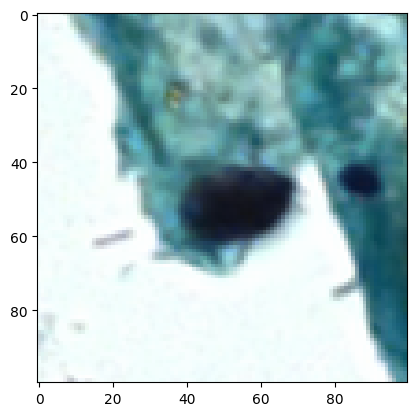

In [65]:
plt.imshow(images[191,:,:,:])

# Dividindo dados em Treino e Teste

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size = 0.3)

In [67]:
print('Tamanho do Treino: ', X_train.shape)
print('Tamanho do Teste: ', X_test.shape)

Tamanho do Treino:  (138, 100, 100, 3)
Tamanho do Teste:  (60, 100, 100, 3)


# Construindo a CNN

In [68]:
import keras
import keras.layers as layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from time import time

In [69]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(100,100,3),name='layer_conv1'))
model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool1'))

model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',name='layer_conv2'))
model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool2'))

#model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',name='layer_conv3'))
#model.add(layers.MaxPool2D(pool_size=(2, 2),name='layer_pool3'))


model.add(layers.Flatten(name='layer_flatten'))

model.add(layers.Dropout(rate=0.75,name='layer_drop'))

model.add(layers.Dense(units=256, activation='relu',name='layer_fc1'))

model.add(layers.Dense(units=128, activation='relu',name='layer_fc2'))

model.add(layers.Dense(units=2, activation = 'softmax',name='layer_softmax'))

In [70]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_conv1 (Conv2D)        (None, 98, 98, 64)        1792      
                                                                 
 layer_pool1 (MaxPooling2D)  (None, 49, 49, 64)        0         
                                                                 
 layer_conv2 (Conv2D)        (None, 47, 47, 64)        36928     
                                                                 
 layer_pool2 (MaxPooling2D)  (None, 23, 23, 64)        0         
                                                                 
 layer_flatten (Flatten)     (None, 33856)             0         
                                                                 
 layer_drop (Dropout)        (None, 33856)             0         
                                                                 
 layer_fc1 (Dense)           (None, 256)              

In [83]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.legacy.SGD(0.0001), metrics=['accuracy'])

In [84]:
EPOCHS = 125
BATCH_SIZE = 8

In [85]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.2)
train_generator = ImageDataGenerator().flow(X_train, Y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, Y_validation, batch_size=BATCH_SIZE)

In [86]:
BATCH_SIZE

8

In [87]:
steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps, 
                    shuffle=True, callbacks=[tensorboard])

Epoch 1/125


/var/folders/29/5dv_l5l530z1h9r5814wdc0r0000gn/T/ipykernel_18446/3863351427.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS,


8/8 [==============================] - 1s 57ms/step - loss: 0.1330 - accuracy: 0.9677 - val_loss: 0.1381 - val_accuracy: 0.9375
Epoch 2/125
8/8 [==============================] - 0s 57ms/step - loss: 0.1826 - accuracy: 0.8871 - val_loss: 0.1289 - val_accuracy: 0.9375
Epoch 3/125
8/8 [==============================] - 0s 50ms/step - loss: 0.1652 - accuracy: 0.9516 - val_loss: 0.1092 - val_accuracy: 0.9375
Epoch 4/125
8/8 [==============================] - 0s 54ms/step - loss: 0.1246 - accuracy: 0.9516 - val_loss: 0.1264 - val_accuracy: 0.9375
Epoch 5/125
8/8 [==============================] - 0s 45ms/step - loss: 0.1019 - accuracy: 0.9677 - val_loss: 0.1287 - val_accuracy: 0.9375
Epoch 6/125
8/8 [==============================] - 0s 47ms/step - loss: 0.1413 - accuracy: 0.9516 - val_loss: 0.1260 - val_accuracy: 0.9375
Epoch 7/125
8/8 [==============================] - 0s 50ms/step - loss: 0.1183 - accuracy: 0.9516 - val_loss: 0.0538 - val_accuracy: 1.0000
Epoch 8/125
8/8 [===============

In [82]:
score = model.evaluate(X_test, Y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 33ms/step - loss: 0.2355 - accuracy: 0.9000
Test loss: 0.2354932427406311
Test accuracy: 0.8999999761581421


# Trabalho Final

1. Criar um projeto completo de visão computacional
    - O projeto deverá resolver algum problema real, de preferência o que já foi utilizado nos trabalhos anteriores;
    - A metodologia do projeto deverá ser detalhada com todas as etapas necessárias: dados, pre-processamento, segmentação, extração de características, experimentos realizados, avaliação dos resultados.
    - Será obrigatório o uso de Redes Neurais Convolucionais: Treinados do Zero, Pré-treinadas; e utilizando Fine-Tuning;
2. A partir do projeto concluído, deverá ser elaborado um artigo de até 10 páginas.
    - Deverá ser utilizado a template de artigos da SBC;
    - O artigo deverá conter: introdução, trabalhos relacionados, metodologia, resultados e discussão, e conclusão;
    - A metodologia deverá contar todos os detalhes necessários que garantam a reprodutibilidade do trabalho;
    - Fluxogramas, gráficos, tabelas, resultados visuais (casos de acerto e falha) são essenciais no artigo;
    - A discussão deverá elencar os motivos pelos quais o métodos chegou aos resultados apresentados. Além disso, essa seção deverá apresentar as principais limitações do trabalho desenvolvido.
3. As apresentações dos trabalhos serão dia 07/02/2024.
    - Cada aluno deverá criar uma apresentação de slides, simulando uma apresentação em um congresso;
    - O apresentador terá até 10 min para apresentar seu trabalho, e a plateia terá até 5 min para realizar questionamentos.
4. Todos os códigos deverão estar disponibilizados em algum sistema de controle de versão (GitHub, GitLab, etc.)
5. Cada autor deverá informar para qual congresso irá enviar o trabalho.